In [1]:
import os
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import requests
import time
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.cm as cm
%matplotlib inline

lemmatizer = WordNetLemmatizer()

path = 'C:/Users/gadge/OneDrive/Desktop/MachineLearning/Project/Data/CleanBooks_v1'

filenames = os.listdir(path)

In [2]:
filelist = [path+'/'+i for i in filenames]


vectorizer = CountVectorizer(stop_words = 'english',max_df=0.9,input = 'filename')
X = vectorizer.fit_transform(filelist)

words = vectorizer.get_feature_names()

X = X.toarray()
X = preprocessing.normalize(X)


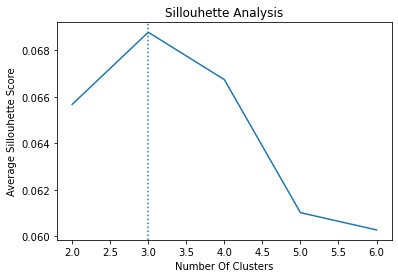

In [3]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,init = 'k-means++')
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.axvline(range_n_clusters[np.argmax(np.array(silhouette_avg))], ls=':')
plt.xlabel('Number Of Clusters')
plt.ylabel("Average Sillouhette Score")
plt.title("Sillouhette Analysis")
plt.show()

In [4]:
filenames = [i.split("_")[1][:-4] for i in filenames]
cluster_df = pd.DataFrame(filenames,columns = ['Book'])

In [5]:
k = 3

kmeans = KMeans(n_clusters=k,init = 'k-means++',random_state=0)
kmeans.fit(preprocessing.normalize(X))
cluster_labels_3 = kmeans.labels_

cluster_labels_3

cluster_df['Cluster'] = cluster_labels_3
cluster_df

,Book,Cluster
0,Chirstmas Carol,1
1,Great Expectations,1
2,Oliver Twist,1
3,Pickwick papers,1
4,Tale of Two Cities,1
5,Emma,0
6,Mansfield Park,0
7,Northanger Abby,0
8,Persuasion,0
9,Pride and Prejudice,0


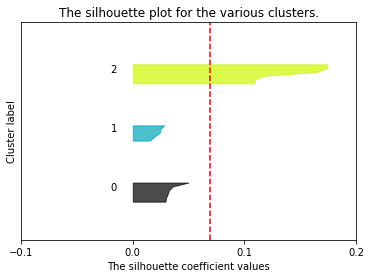

In [6]:
sample_silhouette_values = silhouette_samples(X, cluster_labels_3)

y_lower = 10
fig, ax1 = plt.subplots(1,1)

ax1.set_xlim([-0.1,0.2])
ax1.set_ylim([0, len(X) + (k + 1) * 10])

for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_3 == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg[1], color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0,0.1,0.2])


In [9]:
cluster_df['silhouette'] = sample_silhouette_values
cluster_df

,Book,Cluster,silhouette
0,Chirstmas Carol,1,0.015423
1,Great Expectations,1,0.024802
2,Oliver Twist,1,0.028028
3,Pickwick papers,1,0.024062
4,Tale of Two Cities,1,0.019173
5,Emma,0,0.031247
6,Mansfield Park,0,0.029235
7,Northanger Abby,0,0.035848
8,Persuasion,0,0.032373
9,Pride and Prejudice,0,0.049801


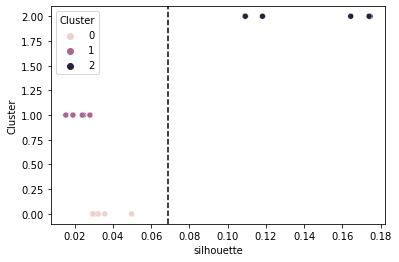

In [15]:
import seaborn as sns
fig, ax1 = plt.subplots(1,1)
ax1 = sns.scatterplot(x = 'silhouette',y = 'Cluster',hue = 'Cluster',data = cluster_df)
ax1.axvline(x=silhouette_avg[1], color="black", linestyle="--")

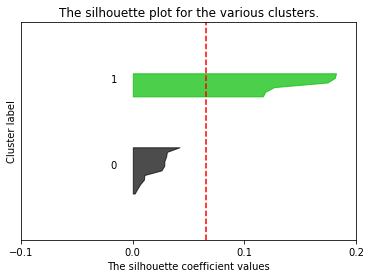

In [16]:
k = 2

kmeans = KMeans(n_clusters=k,init = 'k-means++',random_state=0)
kmeans.fit(preprocessing.normalize(X))
cluster_labels_2 = kmeans.labels_

cluster_labels_2

cluster_df['Cluster_2'] = cluster_labels_2

sample_silhouette_values = silhouette_samples(X, cluster_labels_2)

y_lower = 10
fig, ax1 = plt.subplots(1,1)

ax1.set_xlim([-0.1,0.2])
ax1.set_ylim([0, len(X) + (k + 1) * 10])

for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_2 == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg[0], color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0,0.1,0.2])


In [17]:
cluster_df['silhouette_2'] = sample_silhouette_values
cluster_df

,Book,Cluster,silhouette,Cluster_2,silhouette_2
0,Chirstmas Carol,1,0.015423,0,0.001660
1,Great Expectations,1,0.024802,0,0.006545
2,Oliver Twist,1,0.028028,0,0.009968
3,Pickwick papers,1,0.024062,0,0.010384
4,Tale of Two Cities,1,0.019173,0,0.004014
5,Emma,0,0.031247,0,0.028191
6,Mansfield Park,0,0.029235,0,0.025658
7,Northanger Abby,0,0.035848,0,0.028296
8,Persuasion,0,0.032373,0,0.030546
9,Pride and Prejudice,0,0.049801,0,0.041860


In [52]:
cluster_df[['Book','Cluster_2']]

,Book,Cluster_2
0,Chirstmas Carol,0
1,Great Expectations,0
2,Oliver Twist,0
3,Pickwick papers,0
4,Tale of Two Cities,0
5,Emma,0
6,Mansfield Park,0
7,Northanger Abby,0
8,Persuasion,0
9,Pride and Prejudice,0


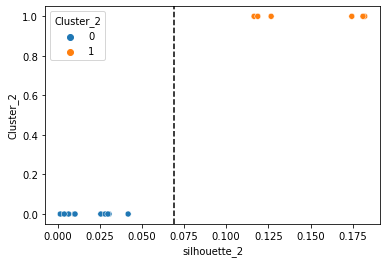

In [19]:
import seaborn as sns
fig, ax1 = plt.subplots(1,1)
ax1 = sns.scatterplot(x = 'silhouette_2',y = 'Cluster_2',hue = 'Cluster_2',data = cluster_df)
ax1.axvline(x=silhouette_avg[1], color="black", linestyle="--")

In [8]:
import networkx as nx
from pyvis.network import Network

Dist_mat = euclidean_distances(X,X)
Dist_df = pd.DataFrame(Dist_mat)

Dist_df.columns = filenames
Dist_df['source'] = filenames

Dist_df = Dist_df.melt(id_vars=["source"], 
        var_name="Target", 
        value_name="Distance")

Dist_df['Type'] = 'undirected'

In [9]:
Dist_df = Dist_df[Dist_df['Distance'] > 0]
Dist_df = Dist_df.drop_duplicates(subset = 'Distance', keep = 'first')
Dist_df

,source,Target,Distance,Type
1,Great Expectations,Chirstmas Carol,1.351541,undirected
2,Oliver Twist,Chirstmas Carol,1.373297,undirected
3,Pickwick papers,Chirstmas Carol,1.371771,undirected
4,Tale of Two Cities,Chirstmas Carol,1.368680,undirected
5,Emma,Chirstmas Carol,1.398354,undirected
...,...,...,...,...
237,The Shining,It,1.230468,undirected
246,Persuasion,Misery,1.399228,undirected
253,Salems Lot,Misery,1.220718,undirected
254,The Shining,Misery,1.253667,undirected


In [10]:
G = nx.from_pandas_edgelist(Dist_df,
                            source = 'source',
                            target = 'Target',
                            edge_attr = 'Distance')

<ipython-input-29-574ccb5a3405>:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


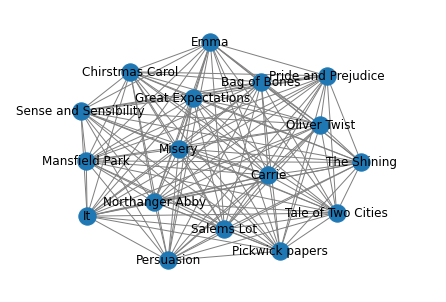

In [29]:
nx.draw(G, with_labels=True,pos=nx.spring_layout(G),font_color = 'black',edge_color = 'grey')
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.4*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

<ipython-input-30-c81fe9dcd0a6>:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


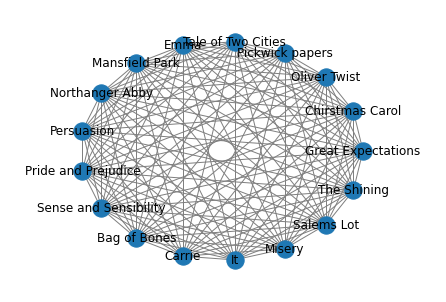

In [30]:
nx.draw_circular(G,with_labels = True,edge_color = 'grey')
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.4*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

In [26]:
b_Array = np.array([[1,2,3],[2,4,5],[1,4,2]])

In [27]:
b = preprocessing.normalize(b_Array)
b

array([[0.26726124, 0.53452248, 0.80178373],
       [0.2981424 , 0.59628479, 0.74535599],
       [0.21821789, 0.87287156, 0.43643578]])

In [28]:
import math
1/(14**0.5)

0.2672612419124244

In [44]:
euclidean_distances(b,b)

array([[0.        , 0.08917577, 0.50036434],
       [0.08917577, 0.        , 0.42227937],
       [0.50036434, 0.42227937, 0.        ]])

In [45]:
ss = (b[2]-b[0])**2
ss
sum(ss)**0.5

0.5003643366993566

In [38]:
b[1]-b[0]

array([ 0.03088116,  0.06176231, -0.05642773])

In [40]:
sum(ss)

0.007952317776010603

In [41]:
sum(b[1])

1.639783183499846

In [46]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00099234],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
pd.DataFrame(X,columns = words).iloc[:,50:80]

,ababa,aback,abandon,abandoned,abandoning,abandonment,abase,abased,abashed,abate,...,abbreviate,abbreviation,abc,abdication,abdomen,abducted,abducting,abduction,abdy,abear
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
1,0.0000,0.000816,0.000000,0.001632,0.000000,0.000000,0.000000,0.000816,0.000816,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.001632
2,0.0000,0.000000,0.000761,0.000761,0.000000,0.000000,0.000761,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
3,0.0000,0.000308,0.000308,0.000923,0.000308,0.000000,0.000000,0.000000,0.001539,0.000308,...,0.000308,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000308,0.000000,0.000000
4,0.0000,0.001135,0.001135,0.011355,0.001135,0.001135,0.000000,0.000000,0.001135,0.001135,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000673,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000688,0.001376,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001165,0.000000,0.001165,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
9,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
